In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


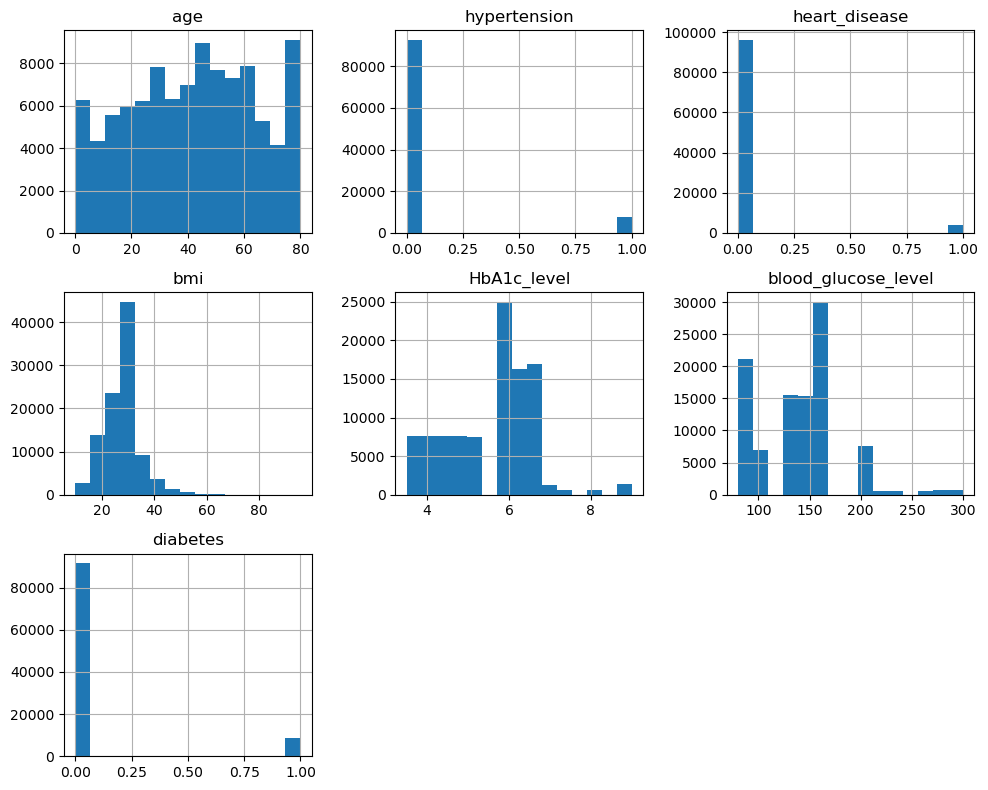

In [130]:
df.hist(figsize=(10,), bins=15)
plt.tight_layout()
plt.show()

# TẠO RA BÁO CÁO TỔNG QUAN VỀ BỘ DỮ LIỆU 

In [5]:
#pip install pandas-profiling

In [6]:
from pandas_profiling import ProfileReport

C:\Users\Admin\AppData\Local\Temp\ipykernel_10312\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [7]:
profile = ProfileReport(df, title = 'Diabeties Dataset')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Hiển thị dữ liệu trùng lặp**

In [8]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


**Xóa dữ liệu trùng lặp**

In [9]:
df = df.drop_duplicates()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


**Mã hóa thuộc tính gender và smoking_history về dạng số**

In [82]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['smoking_history'] = lb_make.fit_transform(df['smoking_history'])
df['gender'] = lb_make.fit_transform(df['gender'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


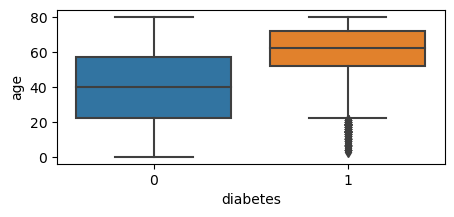

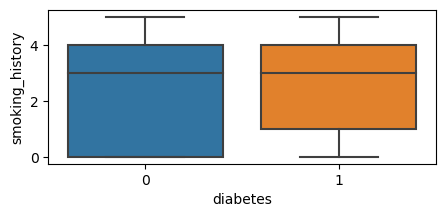

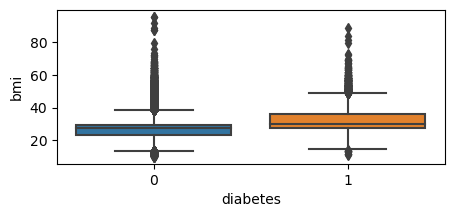

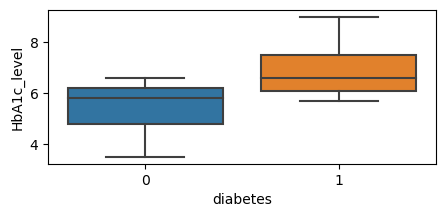

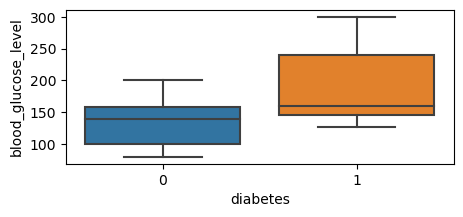

In [11]:
features = ['age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for feature in features:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df['diabetes'],y = df[feature])
    plt.show()

**Xử lí dữ liệu ngoại lai**

In [12]:
# Tính toán Q1 và Q3 cho các cột cần xử lý
columns_to_process = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for column in columns_to_process:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Lọc dữ liệu để loại bỏ outlier
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]   

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,79194.0,0.411963,0.492653,0.00,0.00,0.00,1.0,2.0
age,79194.0,38.527099,22.040072,0.08,21.00,38.00,55.0,80.0
hypertension,79194.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0
heart_disease,79194.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0
smoking_history,79194.0,2.144506,1.905480,0.00,0.00,2.00,4.0,5.0
bmi,79194.0,25.957425,5.151999,13.44,22.62,27.32,28.1,38.8
HbA1c_level,79194.0,5.441648,0.988553,3.50,4.80,5.80,6.2,8.2
blood_glucose_level,79194.0,134.090663,34.966920,80.00,100.00,140.00,158.0,240.0
diabetes,79194.0,0.037187,0.189221,0.00,0.00,0.00,0.0,1.0


**Hiện thị cột Diabetes**

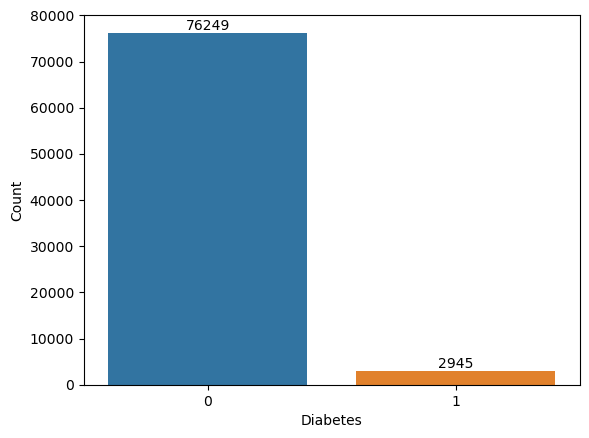

In [14]:
value_countss = df['diabetes'].value_counts()

asn = sns.countplot(x='diabetes', data=df)

for i1, count1 in enumerate(value_countss):
    asn.text(i1, count1 + 0.1, str(count1), ha='center', va='bottom')
    
plt.xlabel('Diabetes')
plt.ylabel('Count')    
    
plt.show()

In [15]:
#pip install --user scikit-learn==1.2.2

In [16]:
#pip install imbalanced-learn

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#Sử dụng kỹ thuật SMOTE để cân bằng dữ liệu trong cột target (*)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [18]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,54.000000,0,0,0,27.320000,6.600000,80
1,1,28.000000,0,0,4,27.320000,5.700000,158
2,0,36.000000,0,0,1,23.450000,5.000000,155
3,0,20.000000,0,0,4,27.320000,6.600000,85
4,0,44.000000,0,0,4,19.310000,6.500000,200
...,...,...,...,...,...,...,...,...
152493,0,80.000000,0,0,4,23.744492,8.118042,160
152494,0,53.000000,0,0,1,30.062407,6.936485,140
152495,0,69.616904,0,0,3,32.253238,6.195774,126
152496,1,58.281702,0,0,3,34.417319,6.518298,155


In [19]:
import sklearn
print(sklearn.__version__)

1.2.2


In [20]:
df_y = pd.DataFrame(y)

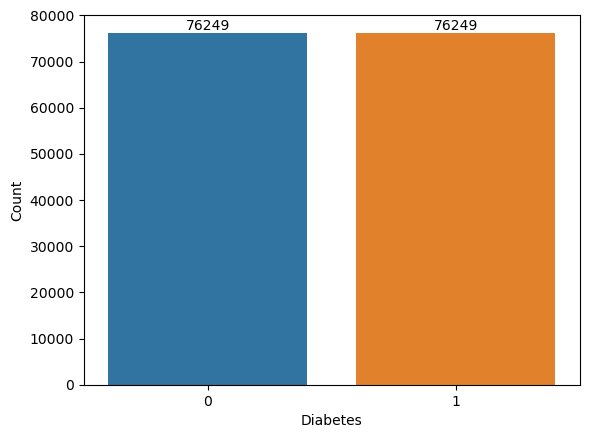

In [21]:
value_counts = df_y['diabetes'].value_counts()

ax = sns.countplot(x='diabetes', data=df_y)

for i, count in enumerate(value_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')
    
plt.xlabel('Diabetes')
plt.ylabel('Count')    
    
plt.show()

**Viết gì đó ở đây (tại sao lại áp dụng SMOTE, giải thích cách hoạt động của kỹ thuật này)**

# Xây dựng mô hình

**Scaling data**

In [22]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

#  Chia tập dữ liệu thành tập train và tập test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [85]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
113602,0,28.996860,0,0,3,32.189749,8.197802,155
138094,1,70.000000,0,0,4,27.320000,5.830540,200
32131,1,61.000000,0,0,0,25.540000,5.800000,126
130725,0,69.379452,0,0,4,34.567617,6.445068,126
108287,0,49.000000,0,0,4,29.031339,6.435901,130
...,...,...,...,...,...,...,...,...
119879,0,44.509073,0,0,2,28.174213,6.361795,126
103694,0,71.223267,0,0,3,34.212104,7.500000,200
131932,0,60.224622,0,0,4,28.948704,6.500000,159
146867,0,57.000000,0,0,0,33.848095,6.580475,220


In [87]:
yt = pd.DataFrame(y_train)
yt

,diabetes
113602,1
138094,1
32131,1
130725,1
108287,1
...,...
119879,1
103694,1
131932,1
146867,1


# Giải thích vì sao không sử dụng Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred_LR = model_LR.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE: ", (mean_absolute_error(y_test, y_pred_LR)))
print("MSE: ", (mean_squared_error(y_test, y_pred_LR)))
print("R2 score: ", (r2_score(y_test, y_pred_LR)*100))

MAE:  0.28625571097444796
MSE:  0.11754568250569641
R2 score:  52.98160398527598


# Áp dụng mô hình Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
model_LoR = LogisticRegression(random_state=42)
model_LoR.fit(X_train, y_train)
y_pred_LoR = model_LoR.predict(X_test)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Confusion Matrix:
[[19074  3764]
 [ 2834 20078]]


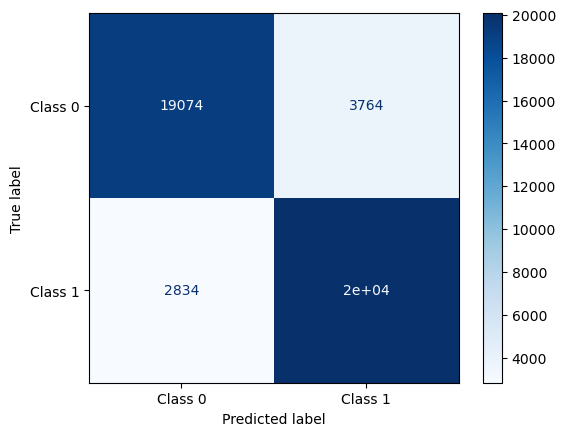

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmLR = confusion_matrix(y_test, y_pred_LoR)
print("Confusion Matrix:")
print(cmLR)

disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

In [29]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_LoR = accuracy_score(y_test, y_pred_LoR)
report_LoR = classification_report(y_test, y_pred_LoR)

print('Classification Report:')
print(report_LoR)

print('Accuracy: ', accuracy_score(y_test, y_pred_LoR)*100)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     22838
           1       0.84      0.88      0.86     22912

    accuracy                           0.86     45750
   macro avg       0.86      0.86      0.86     45750
weighted avg       0.86      0.86      0.86     45750

Accuracy:  85.57814207650273


# Áp dụng mô hình KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(metric = 'euclidean')
knn1.fit(X_train, y_train)
y_pred_knn1 = knn1.predict(X_test)

In [102]:
from sklearn.metrics import classification_report
#Ma trận độ chính xác mô hình
print (classification_report(y_test,y_pred_knn1))

print('Accuracy: ', accuracy_score(y_test, y_pred_knn1)*100)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     22838
           1       0.89      0.99      0.94     22912

    accuracy                           0.94     45750
   macro avg       0.94      0.94      0.94     45750
weighted avg       0.94      0.94      0.94     45750

Accuracy:  93.59562841530055


**Kịch bản nâng cao độ hiệu quả mô hình**


([<matplotlib.axis.XTick at 0x270697f3190>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

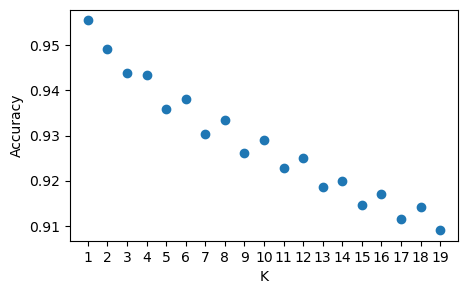

In [100]:
k_rng = range(1,20)
scores = []
for k in k_rng:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure(figsize=(5, 3))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_rng, scores)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

**Ở đây, chúng mình sẽ chọn k = 3 vì mình nghĩ nếu k = 1 sẽ rất dễ gặp phải những điểm nhiễu và nhạy cảm**

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', weights = 'distance')
knn.fit(X_train, y_train)
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

**Ma trận nhầm lẫn của thuật toán KNN với K = 3**

Confusion Matrix:
[[20726  2112]
 [  307 22605]]


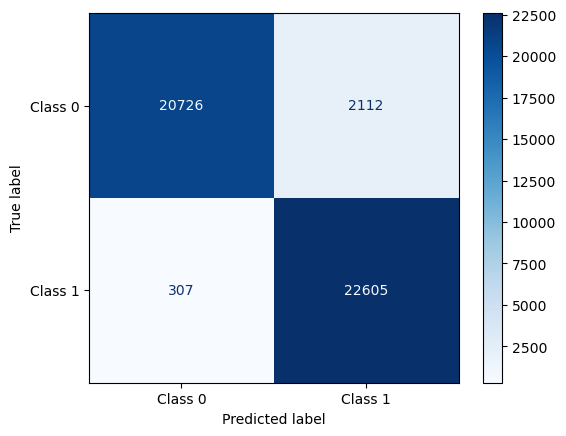

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

**Tại sao ở đây khi mình chọn K = 3 thì Accuracy lại cao hơn Accuracy trong biểu đồ trên?**

**Vì mình đã sử dụng thêm tham số weights = 'distance'. Tức là mình đã đánh trọng số cho các điểm lân cận.**
**Các điểm càng gần với điểm test data thì sẽ có trọng số cao hơn, chính vì vậy mà Accuracy sẽ tăng lên!!**

In [35]:
from sklearn.metrics import classification_report
#Ma trận độ chính xác mô hình
print (classification_report(y_test,y_pred_knn))

print('Accuracy: ', accuracy_score(y_test, y_pred_knn)*100)

              precision    recall  f1-score   support

           0       0.99      0.91      0.94     22838
           1       0.91      0.99      0.95     22912

    accuracy                           0.95     45750
   macro avg       0.95      0.95      0.95     45750
weighted avg       0.95      0.95      0.95     45750

Accuracy:  94.71256830601092


# Áp dụng mô hình Decesion Tree

In [103]:
# Khai báo thư viện mô hình cây quyết định
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(random_state = 42)
dtree1.fit(X_train, y_train)
y_pred_DT1 = dtree1.predict(X_test)

In [104]:
accuracy_DT1 = accuracy_score(y_test, y_pred_DT1)
report_DT1 = classification_report(y_test, y_pred_DT1)

print("Decision Tree Classification Report:\n", report_DT1)

print("Accuracy:", accuracy_DT1*100)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     22838
           1       0.98      0.98      0.98     22912

    accuracy                           0.98     45750
   macro avg       0.98      0.98      0.98     45750
weighted avg       0.98      0.98      0.98     45750

Accuracy: 97.81639344262295


**Kịch bản nâng cao độ chính xác mô hình**

In [63]:
from sklearn.model_selection import GridSearchCV
# Xác định các giá trị max depth, min samples leaf và min samples split muốn kiểm tra
param_grid = {'max_depth': [None, 20, 30, 40, 50],
              'min_samples_leaf': [2, 3, 4, 5, 6, 7],
              'min_samples_split': [7, 8, 9, 10 ,11, 12, 13, 14, 15, 20, 25]}

# Tạo mô hình cây quyết định
dtree = DecisionTreeClassifier(random_state = 42)

# Tìm kiếm siêu tham số tối ưu sử dụng GridSearchCV
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra với mô hình tốt nhất
y_pred_DT = grid_search.predict(X_test)

# In ra giá trị tối ưu cho độ sâu
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])
print("Best min_samples_split:", grid_search.best_params_['min_samples_split'])

# Đánh giá hiệu suất
accuracy_DT = accuracy_score(y_test, y_pred_DT)
report_DT = classification_report(y_test, y_pred_DT)


print("Decision Tree Classification Report:\n", report_DT)

print("Accuracy:", accuracy_DT*100)

Best max_depth: 30
Best min_samples_leaf: 2
Best min_samples_split: 8
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     22838
           1       0.98      0.98      0.98     22912

    accuracy                           0.98     45750
   macro avg       0.98      0.98      0.98     45750
weighted avg       0.98      0.98      0.98     45750

Accuracy: 98.13333333333333


Confusion Matrix:
[[22483   355]
 [  499 22413]]


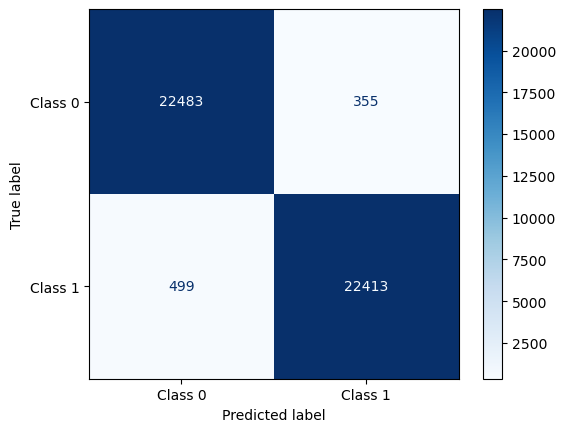

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_DT = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix:")
print(cm_DT)

disp_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=['Class 0', 'Class 1'])
disp_DT.plot(cmap=plt.cm.Blues)

**Phương pháp đánh giá mô hình có bị overfitting hay không**

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model_DT = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'accuracy')

#Tạo đối tượng KFold với K = 10 (10-fold cross-validation)
kfold_DT = KFold(n_splits = 10, shuffle = True, random_state = 42)

#Đánh giá hiệu suất của mô hình bằng cross_val_score
scores_DT = cross_val_score(model_DT, X_train, y_train, cv=kfold_DT, scoring = 'accuracy')

In [133]:
# In độ chính xác từ mỗi lần lặp và độ chính xác trung bình
for i, score in enumerate(scores_DT, 1):
    print(f'Fold {i}: {score:.4f}')
    
print(f'Accuracy Mean: {scores_DT.mean():.4f}')

Fold 1: 0.9786
Fold 2: 0.9808
Fold 3: 0.9803
Fold 4: 0.9792
Fold 5: 0.9785
Fold 6: 0.9832
Fold 7: 0.9794
Fold 8: 0.9778
Fold 9: 0.9810
Fold 10: 0.9788
Accuracy Mean: 0.9798


# Áp dụng mô hình Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(X_train, y_train)
y_pred_RF = rf.predict(X_test)



#Kết quả của mô hình
report_RF = classification_report(y_test, y_pred_RF)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Classification Report:\n", report_RF)

print("Model Accuracy:", accuracy_RF*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     22838
           1       0.98      0.98      0.98     22912

    accuracy                           0.98     45750
   macro avg       0.98      0.98      0.98     45750
weighted avg       0.98      0.98      0.98     45750

Model Accuracy: 97.98251366120219


**Kịch bản nâng cao hiệu quả mô hình**

In [43]:
n_estimators_values = [50, 100, 150, 200, 250, 300]  # Các giá trị của n_estimators bạn muốn thử nghiệm
accuracies = []

for n_estimators in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred_RF = rf_classifier.predict(X_test)
    accuracy_RF = accuracy_score(y_test, y_pred_RF)
    accuracies.append(accuracy_RF)
    
    print(n_estimators)
    print(accuracy_RF)

# Chọn giá trị n_estimators tốt nhất
best_n_estimators = n_estimators_values[accuracies.index(max(accuracies))]
print(f"Best n_estimators: {best_n_estimators}")

50
0.9798251366120219
100
0.9806994535519126
150
0.9800218579234973
200
0.9802185792349727
250
0.9801530054644809
300
0.9801967213114754
Best n_estimators: 100


**Chọn n_estimators (số cây quyết định) = 100**

In [107]:
#Thực thi mô hình với n_estimators = 100

rf_classifier = RandomForestClassifier(n_estimators= 100, random_state=42, max_depth = None, min_samples_leaf = 1, min_samples_split = 2)
rf_classifier.fit(X_train, y_train)

y_pred_RF = rf_classifier.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)

#Kết quả của mô hình
report_RF = classification_report(y_test, y_pred_RF)
print("Classification Report:\n", report_RF)

print("Model Accuracy:", accuracy_RF*100)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     22838
           1       0.98      0.98      0.98     22912

    accuracy                           0.98     45750
   macro avg       0.98      0.98      0.98     45750
weighted avg       0.98      0.98      0.98     45750

Model Accuracy: 98.06994535519125


Confusion Matrix:
[[22366   472]
 [  411 22501]]


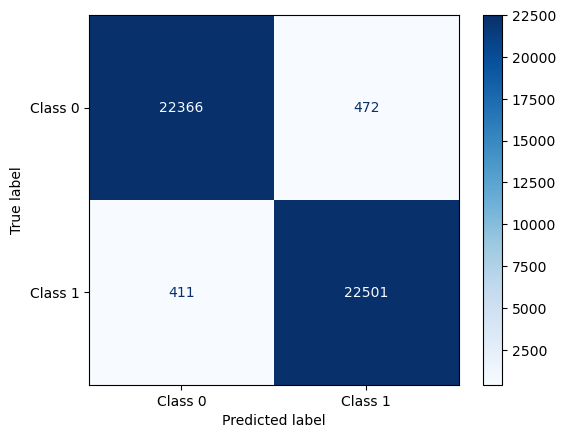

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_RF = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:")
print(cm_RF)

disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=['Class 0', 'Class 1'])
disp_RF.plot(cmap=plt.cm.Blues)

In [108]:
model_RF = RandomForestClassifier(n_estimators=100, random_state = 42, max_depth = None)

# Tạo đối tượng KFold với k=10 (10-fold cross-validation)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Đánh giá hiệu suất của mô hình bằng cross_val_score
scores_T = cross_val_score(model_RF, X_train, y_train, cv=kfold, scoring='accuracy')

# In độ chính xác từ mỗi lần lặp và độ chính xác trung bình
for i, score in enumerate(scores_T, 1):
    print(f'Fold {i}: {score:.4f}')
    
print(f'Accuracy Mean: {scores_T.mean():.4f}')

Fold 1: 0.9754
Fold 2: 0.9788
Fold 3: 0.9793
Fold 4: 0.9790
Fold 5: 0.9784
Fold 6: 0.9817
Fold 7: 0.9782
Fold 8: 0.9758
Fold 9: 0.9785
Fold 10: 0.9800
Accuracy Mean: 0.9785


**Dự đoán 20 dòng dữ liệu bất kì trong dataset**

In [121]:
#Decision Tree
random_predict_rows = df.sample (random_state = 42, n = 20)

X_sample = random_predict_rows.iloc[: , :-1]
y_sample = random_predict_rows.iloc[:, -1]

best_RF_model = DecisionTreeClassifier(max_depth = 30, random_state = 42, min_samples_leaf = 2, min_samples_split = 8)
best_RF_model.fit(X_train, y_train)

y_pred_sample = best_RF_model.predict(X_sample)

predictions_df = pd.DataFrame({"Actual": y_sample, "Predicted": y_pred_sample})
print(predictions_df)

       Actual  Predicted
76758       0          0
19317       1          0
364         0          0
99205       0          0
60564       0          0
8818        0          0
51123       0          0
73719       0          0
63675       0          0
74727       1          1
85607       0          0
51095       1          1
54881       1          1
65464       0          0
88054       0          0
16861       0          0
1524        0          0
81986       0          0
8670        0          0
78043       0          0


In [126]:
#Random Forest
random_predict_rows = df.sample(random_state = 42, n = 20)

X_sample = random_predict_rows.iloc[: , :-1]
y_sample = random_predict_rows.iloc[:, -1]

best_RF_model = RandomForestClassifier(n_estimators= 100, random_state=42, max_depth = None, min_samples_leaf = 1, min_samples_split = 2)
best_RF_model.fit(X_train, y_train)

y_pred_sample = best_RF_model.predict(X_sample)

predictions_df = pd.DataFrame({"Actual": y_sample, "Predicted": y_pred_sample})
print(predictions_df)

       Actual  Predicted
76758       0          0
19317       1          1
364         0          0
99205       0          0
60564       0          0
8818        0          0
51123       0          0
73719       0          0
63675       0          0
74727       1          1
85607       0          0
51095       1          1
54881       1          1
65464       0          0
88054       0          0
16861       0          0
1524        0          0
81986       0          0
8670        0          0
78043       0          0
